# Naive Bayes

1. Naive Bayes is a popular and simple probabilistic machine learning algorithm based on Bayes' theorem. 
2. It is commonly used for classification tasks, especially in natural language processing and text classification applications.
3. Despite its simplicity, Naive Bayes often performs surprisingly well and is computationally efficient, making it a popular choice for many real-world problems.
4. The algorithm is based on the assumption of feature independence given the class label. This means that it assumes all features are conditionally independent of each other, given the class label.

## Problem Statement

Prepare a classification model using Naive Bayes 
for salary data 

### Importing libraries

In [449]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [450]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\Naive bayes assignment

17-01-2023  13:29    <DIR>          .
17-01-2023  13:29    <DIR>          ..
17-01-2023  10:26    <DIR>          .ipynb_checkpoints
17-01-2023  13:29           304,353 Naive Bayes Assignment.ipynb
15-01-2023  00:54               617 Problem_statement(salary_data).txt
15-01-2023  00:54         1,694,474 SalaryData_Test.csv
15-01-2023  00:54         3,393,618 SalaryData_Train.csv
               4 File(s)      5,393,062 bytes
               3 Dir(s)  126,363,193,344 bytes free


### Reading Training data file

In [451]:
salary_train = pd.read_csv('salaryData_Train.csv')
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### EDA on training data

In [452]:
# shape of training data file
salary_train.shape

(30161, 14)

In [453]:
# Description about training data
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [454]:
# Inforamtion on datafile
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [455]:
# Value count of salary data
salary_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [456]:
salary_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [457]:
# checking presence of duplicates
salary_train.duplicated().sum()

3258

In [458]:
# checking presence of null value
salary_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### Reading testing Datafile

In [459]:
salary_test = pd.read_csv('salaryData_test.csv')
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### EDA on testing data

In [460]:
# Shape of testing data
salary_test.shape

(15060, 14)

In [461]:
# Description about testing data
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [462]:
# Information on testing data
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [463]:
# checking duplicates in file
salary_test.duplicated().sum()

930

In [464]:
# Value counts on testing data of salary
salary_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [465]:
# Correlation in training data
salary_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [466]:
# Correlation in testing data
salary_test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


### Vizualization

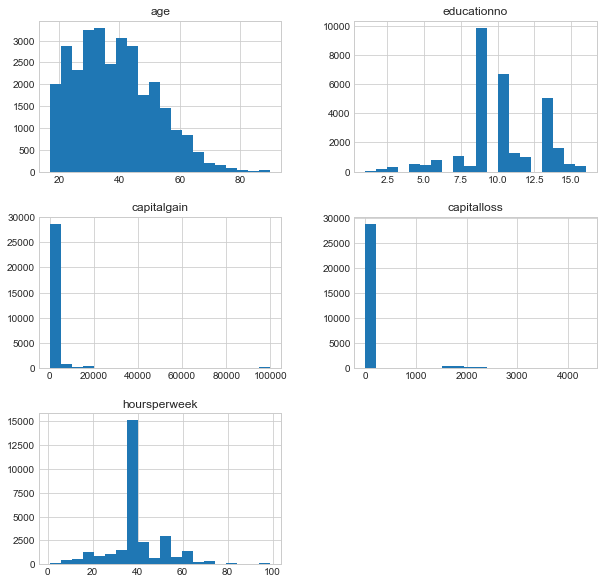

In [467]:
# Histogram on training data
plt.style.use('seaborn-whitegrid')

salary_train.hist(bins=20, figsize=(10,10))
plt.show()

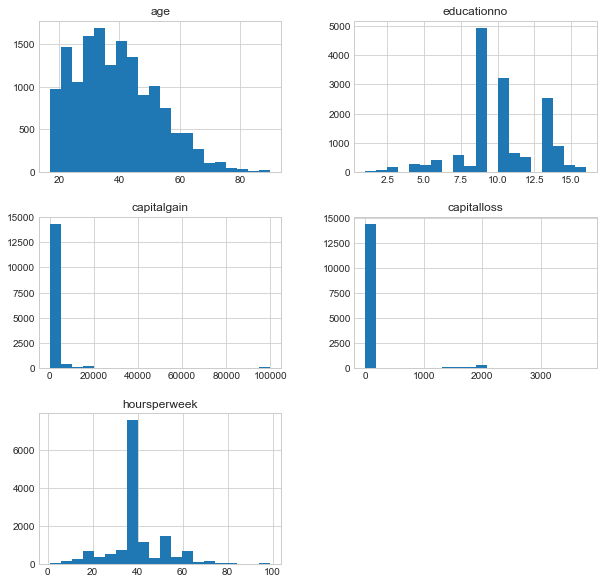

In [468]:
# Histogram on testing data
plt.style.use('seaborn-whitegrid')

salary_test.hist(bins=20, figsize=(10,10))
plt.show()

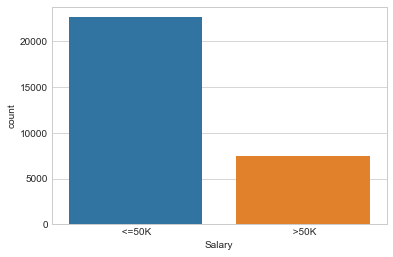

In [469]:
# countplot for Salary of train data
sns.countplot(salary_train['Salary'])
plt.show()

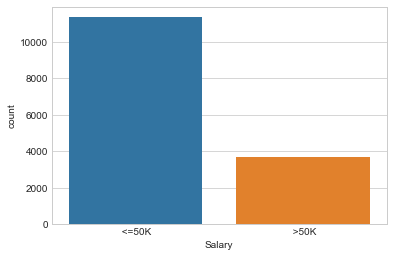

In [470]:
# Countplot for salary of test data
sns.countplot(salary_test['Salary'])
plt.show()

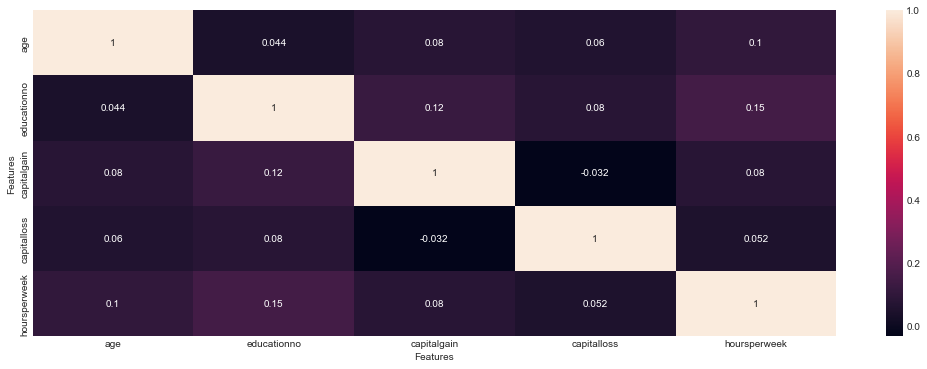

In [471]:
# Plotting heat map on training data
fig= plt.figure(figsize=(18, 6))
sns.heatmap(salary_train.corr(), annot=True)
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

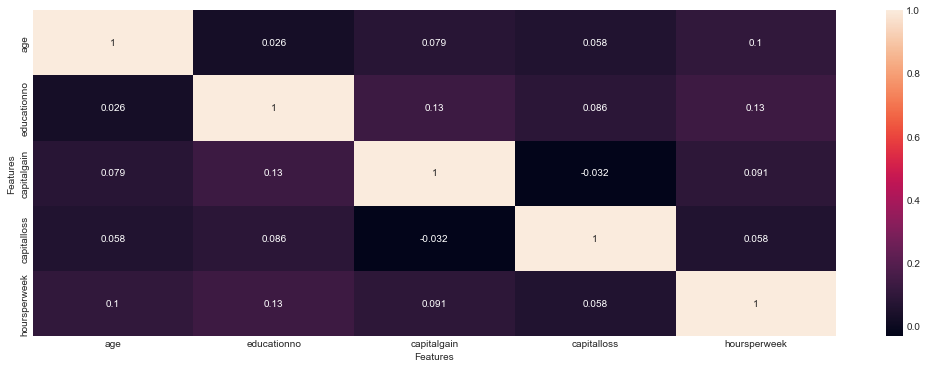

In [472]:
# Plotting heat map on testing data
fig= plt.figure(figsize=(18, 6))
sns.heatmap(salary_test.corr(), annot=True)
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

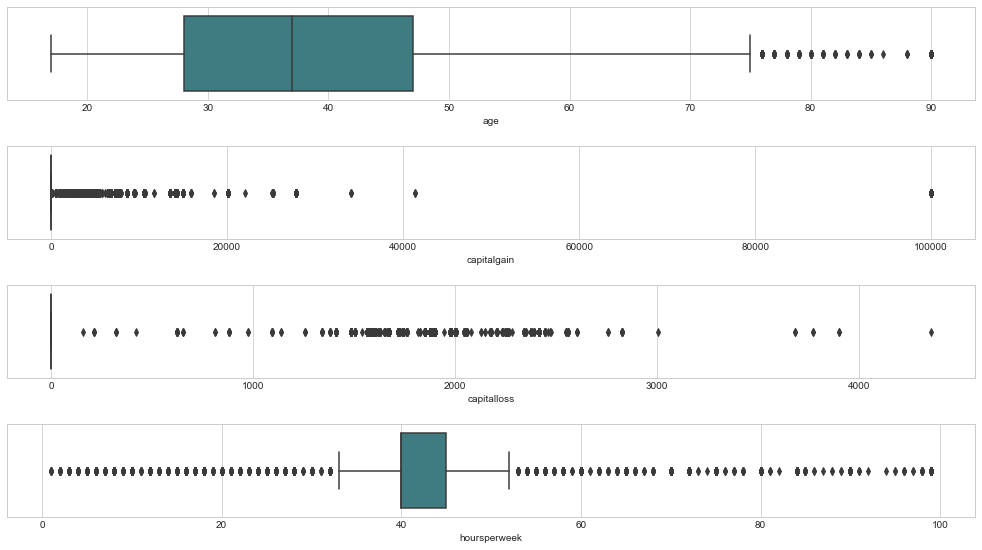

In [473]:
# Outliers detection using box plot
st=salary_train.copy() 
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=st,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=st,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=st,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=st,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

### Data Preprocessing

In [474]:
# File shape of both train data and test data
salary_train.shape,salary_test.shape

((30161, 14), (15060, 14))

In [475]:
# duplicates in training data
salary_train.duplicated().sum() 

3258

In [476]:
# duplicates in testing data
salary_test.duplicated().sum()

930

In [477]:
# Dropping duplicates for training and testing data
salary_train.drop_duplicates(keep=False,inplace=True)
salary_test.drop_duplicates(keep=False,inplace=True)

In [478]:
# Training and testing data shape after dropping duplicates
salary_train.shape,salary_test.shape

((24943, 14), (13450, 14))

In [479]:
print('Shape of training data after dropping duplicates :',salary_train.shape)
print('Shape of testining data after dropping duplicates :',salary_test.shape)

Shape of training data after dropping duplicates : (24943, 14)
Shape of testining data after dropping duplicates : (13450, 14)


In [480]:
# Dropping native column from training data
salary_train.drop('native',axis=1,inplace=True)

In [481]:
# Dropping native column from testing data
salary_test.drop('native',axis=1,inplace=True)

In [482]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [483]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


### Apply Label Encoding

In [489]:
label_encoder=preprocessing.LabelEncoder()

In [490]:
# Converting training data into complete cotegorical data
salary_train['workclass']= label_encoder.fit_transform(salary_train['workclass']) 
salary_train['education']= label_encoder.fit_transform(salary_train['education'])
salary_train['maritalstatus']= label_encoder.fit_transform(salary_train['maritalstatus']) 
salary_train['occupation']=label_encoder.fit_transform(salary_train['occupation'])
salary_train['relationship']=label_encoder.fit_transform(salary_train['relationship'])
salary_train['race']=label_encoder.fit_transform(salary_train['race'])
salary_train['sex']=label_encoder.fit_transform(salary_train['sex'])
salary_train['Salary']=label_encoder.fit_transform(salary_train['Salary'])

In [491]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0


In [492]:
# Converting testing data into complete categorical data
salary_test['workclass']= label_encoder.fit_transform(salary_test['workclass']) 
salary_test['education']= label_encoder.fit_transform(salary_test['education'])
salary_test['maritalstatus']= label_encoder.fit_transform(salary_test['maritalstatus']) 
salary_test['occupation']=label_encoder.fit_transform(salary_test['occupation'])
salary_test['relationship']=label_encoder.fit_transform(salary_test['relationship'])
salary_test['race']=label_encoder.fit_transform(salary_test['race'])
salary_test['sex']=label_encoder.fit_transform(salary_test['sex'])
salary_test['Salary']=label_encoder.fit_transform(salary_test['Salary'])

In [493]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,0
1,38,2,11,9,2,4,0,4,1,0,0,50,0
2,28,1,7,12,2,10,0,4,1,0,0,40,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,1
4,34,2,0,6,4,7,1,4,1,0,0,30,0


In [494]:
# Value count for training data
salary_train.Salary.value_counts()

0    18486
1     6457
Name: Salary, dtype: int64

In [496]:
# Value count for testing data
salary_test.Salary.value_counts()

0    10093
1     3357
Name: Salary, dtype: int64

## Feature Selection using ExtraTreesClassifier

### Training Data

In [497]:
x = salary_train.iloc[:,:-1]
y = salary_train.iloc[:,-1]

In [498]:
x.fillna(0)
x.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,39,5,9,13,4,0,1,4,1,2174,0,40
1,50,4,9,13,2,3,0,4,1,0,0,13
2,38,2,11,9,0,5,1,4,1,0,0,40
3,53,2,1,7,2,5,0,2,1,0,0,40
4,28,2,9,13,2,9,5,2,0,0,0,40


In [499]:
y.fillna(0)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int64

### Target type

In [500]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'binary'

In [503]:
from sklearn.ensemble import ExtraTreesClassifier
# Applying extra trees classifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)


[0.21848319 0.05411917 0.03978264 0.08609386 0.07560082 0.08777722
 0.11042783 0.02049641 0.03140502 0.10860578 0.03359684 0.13361122]


In [504]:
model

ExtraTreesClassifier(n_estimators=10)

In [505]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [506]:
# Calculating important features
col_names = ['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
imp_feature = pd.Series(model.feature_importances_,index=col_names).sort_values(ascending=False)
imp_feature

age              0.218483
hoursperweek     0.133611
relationship     0.110428
capitalgain      0.108606
occupation       0.087777
educationno      0.086094
maritalstatus    0.075601
workclass        0.054119
education        0.039783
capitalloss      0.033597
sex              0.031405
race             0.020496
dtype: float64

### visualization

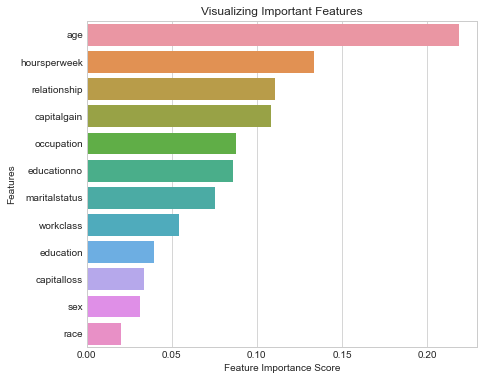

In [508]:
# Plotting bar chart showing importance of feature
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(7,6))
sns.barplot(x=imp_feature, y=imp_feature.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


From above plot we can conclude that columns workclass, capitalloss, education, sex, race has very low impact on model.Whereas column name age,housperweek and capitalgain has most impact on model. so we will be dropping these columns

In [509]:
# Dropping the last five columns from training data
salary_train.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [510]:
salary_train.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,39,13,4,0,1,2174,40,0
1,50,13,2,3,0,0,13,0
2,38,9,0,5,1,0,40,0
3,53,7,2,5,0,0,40,0
4,28,13,2,9,5,0,40,0


In [511]:
# Dropping the same five columns from testing data
salary_test.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [512]:
salary_test.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,25,7,4,6,3,0,40,0
1,38,9,2,4,0,0,50,0
2,28,12,2,10,0,0,40,1
3,44,10,2,6,0,7688,40,1
4,34,6,4,7,1,0,30,0


In [513]:
# Describing most impactive features for training data
salary_train[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,24943.000000,24943.000000,24943.000000
mean,39.433909,1302.317724,41.283045
std,13.218143,8071.604978,12.592211
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,46.000000
max,90.000000,99999.000000,99.000000


In [514]:
# Describing most impactive features for testing data
salary_test[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,13450.000000,13450.000000,13450.000000
mean,39.458364,1237.306468,41.158439
std,13.455382,8050.662571,12.417740
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [515]:
 salary_train.Salary.value_counts()

0    18486
1     6457
Name: Salary, dtype: int64

## Splitting Data into output and input varibale 

### Splitting train data

In [516]:
X1 = salary_train.iloc[:,:-1]
Y1 = salary_train.iloc[:,-1]

In [517]:
X1.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek
0,39,13,4,0,1,2174,40
1,50,13,2,3,0,0,13
2,38,9,0,5,1,0,40
3,53,7,2,5,0,0,40
4,28,13,2,9,5,0,40


In [518]:
Y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int64

### splitting test data

In [519]:
X2 = salary_test.iloc[:,:-1]
Y2 = salary_test.iloc[:,-1]

In [520]:
X2.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek
0,25,7,4,6,3,0,40
1,38,9,2,4,0,0,50
2,28,12,2,10,0,0,40
3,44,10,2,6,0,7688,40
4,34,6,4,7,1,0,30


In [521]:
Y2.head()

0    0
1    0
2    1
3    1
4    0
Name: Salary, dtype: int64

# Naive Bayes Model

## Multinomial Naive Bayes

Multinomial Naive Bayes is a variant of the Naive Bayes algorithm specifically designed for handling discrete feature counts. It is commonly used for text classification tasks where the input features are word occurrences or word frequencies in a document.

In Multinomial Naive Bayes, the input data is represented as a bag-of-words model, where each document is treated as a collection of word occurrences, and the order of the words is disregarded. The algorithm assumes that the occurrence of each word is a discrete event and follows a multinomial distribution.

In [522]:
model_mb = MB()

In [523]:
model_mb.fit(X1,Y1)
Y2_pred_mb = model_mb.predict(X2)
conf_mat1 = confusion_matrix(Y2_pred_mb,Y2)
print('Classification Report :',classification_report(Y2,Y2_pred_mb))
print('='*60)
print('Accuracy :',accuracy_score(Y2_pred_mb,Y2))
print('='*60)
print('Confusion Matrix :',conf_mat1)
print('='*60)
print('Multinomial Naive Bayes model accuracy :',metrics.accuracy_score(Y2,Y2_pred_mb))
print('='*60)

Classification Report :               precision    recall  f1-score   support

           0       0.79      0.95      0.86     10093
           1       0.62      0.23      0.34      3357

    accuracy                           0.77     13450
   macro avg       0.71      0.59      0.60     13450
weighted avg       0.75      0.77      0.73     13450

Accuracy : 0.7733085501858736
Confusion Matrix : [[9627 2583]
 [ 466  774]]
Multinomial Naive Bayes model accuracy : 0.7733085501858736


## Gaussian Naive Bayes

Gaussian Naive Bayes is another variant of the Naive Bayes algorithm, specifically designed for handling continuous feature data that follows a Gaussian (normal) distribution. It is commonly used for classification tasks when the input features are continuous numerical values.

Unlike Multinomial Naive Bayes, which works with discrete feature counts (e.g., word occurrences in text), Gaussian Naive Bayes assumes that the continuous features for each class label are normally distributed. This assumption means that the likelihood of each feature value given the class follows a Gaussian distribution.

In [524]:
model_gb = GB()

In [525]:
model_gb.fit(X1,Y1)
Y2_pred_gb = model_gb.predict(X2)
conf_mat2 = confusion_matrix(Y2,Y2_pred_gb)
print("Classification Report :",classification_report(Y2,Y2_pred_gb))
print('='*60)
print("Accuracy :",accuracy_score(Y2,Y2_pred_gb))
print('='*60)
print("Confusion Matrix :",conf_mat2)
print('='*60)
print("Gaussion Naive Bayes model accuracy :",metrics.accuracy_score(Y2,Y2_pred_gb))
print('='*60)

Classification Report :               precision    recall  f1-score   support

           0       0.79      0.97      0.87     10093
           1       0.75      0.23      0.35      3357

    accuracy                           0.79     13450
   macro avg       0.77      0.60      0.61     13450
weighted avg       0.78      0.79      0.74     13450

Accuracy : 0.7887732342007435
Confusion Matrix : [[9834  259]
 [2582  775]]
Gaussion Naive Bayes model accuracy : 0.7887732342007435
